Author: F. Massin

This is a Jupyter notebook running Python codes. This notebook migth also be viewed in [Jupyter.org](https://nbviewer.jupyter.org/urls/gitlab.seismo.ethz.ch/fmassin/dev-eewenv/raw/master/tests/sceewenv%20tests.ipynb?flush_cache=true#).

In [28]:
%matplotlib inline 

# Introduction
SED has been developing a SeisComP3 module that produce envelope values for the Virtual Seismologist and the Finite-fault Rupture Detector. The purpose of this test is to compare the envelopes produced by sceewenv to actual waveforms and check if sceewenv works correctly.


We could follow two approaches to compare waveforms and envelopes from sceewenv:
- Using event **examples**  from events playback: this migth not be representative but this allows to make detailled comparisons and to choose the most interesting test(s) to do.
- Using **systematic test(s)** from many different seismic records: this is representative but this might be done and interpreted for the most interesting test(s).  

In a first preliminary test we are using examples from Switzerland and Nicaragua.

## Dependencies
All codes for plotting and custom envelope tools are coming from a separate file (`sceewenv_tests.py`) which is included below:

In [42]:
exec(open('sceewenv_tests.py').read())  
version()

sceewenv_tests 1.0.0


Together with file `sceewenv_tests.py`, this notebook is a self-contained test that could be re-used for further analyses.  

# Data preview
We get all event data from FDSN web-services at SED-ETHZ and INETER. Data are post-processed to get accelerations, velocity and displacement for each stations.
General plot parameters:

In [68]:
offset_max=40
section_options={'type' : 'section',
                 'color' : 'channel',
                 'norm_method':'stream',
                 'offset_min':0,
                 'time_down':True}



## Example 1: Linthal event on 2017/3/6 (M4.6, Switzerland)
See the [SED page](http://www.seismo.ethz.ch/fr/earthquakes/switzerland/eventpage.html?originId=%27c21pOmNoLmV0aHouc2VkL3NjM2Evb3JpZ2luL05MTC4yMDE4MDEyMjE3MjgwMC43MTg0NDMuOTYxMzI=%27&date_ch=2017-03-06&time_ch=21:12&region=Linthal%20GL&magnitude=4.6) for event informations.

In [2]:
linthal = fdsnws(base_url="http://arclink.ethz.ch:8080",
                 eventid='smi:ch.ethz.sed/sc3a/2017epaqsp',
                 includeallorigins=False,
                 includeallmagnitudes=False)    

event spec parameters:

In [69]:
origin_time = linthal['catalog'].events[0].preferred_origin().time
Z_velocities = linthal['vel'].select(channel='*Z')

Below is a preview our post-processed waveforms. Plots:

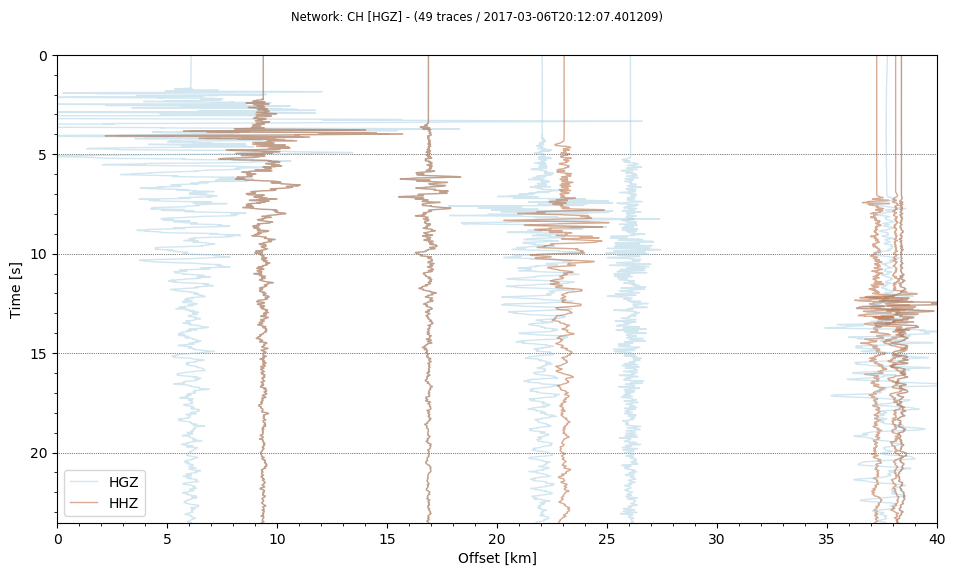

In [70]:
Z_velocities.plot(scale=10,
                  reftime=origin_time,
                  starttime=origin_time,
                  endtime=origin_time+offset_max/1.7,
                  offset_max=offset_max*1000,
                  **section_options)

## Example 2 : Puerto Morazan event on 2016-06-10 (M 6.1, Nicaragua)
See the [NEIC page](https://earthquake.usgs.gov/earthquakes/eventpage/us200063cy#executive) for event informations.


In [4]:
puerto_morazan = fdsnws(base_url="http://165.98.224.52:8081/",
                        maxradius=1.,
                        eventid='ineterloc2016likt',
                        includeallorigins=False,
                        includeallmagnitudes=False)    

Event spec parameters:

In [ ]:
origin_time = puerto_morazan['catalog'].events[0].preferred_origin().time
Z_velocities = puerto_morazan['vel'].select(channel='*Z')

Very poor data oveall. Many broadband instrument are clipped. Plots:

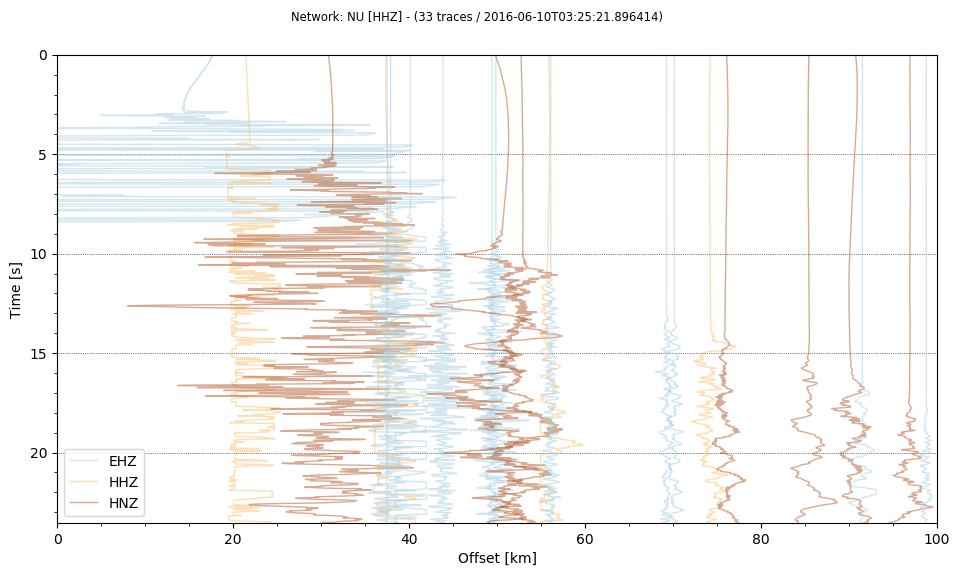

In [34]:
Z_velocities.plot(scale=10,
                  reftime=origin_time,
                  starttime=origin_time,
                  endtime=origin_time+offset_max/1.7,
                  offset_max=offset_max*2.5*1000,
                  **section_options)

## Example 3: small earthquake on 2018/1/19 (M1.2, Switzerland)
See the [SED page](http://www.seismo.ethz.ch/fr/earthquakes/switzerland/eventpage.html?originId=%27c21pOmNoLmV0aHouc2VkL3NjM2Evb3JpZ2luL05MTC4yMDE4MDEyMTE4NDgyOS44NjE2NzkuNjQ0Nzk=%27&event_type=[event_type]&date_ch=2018-01-19&time_ch=21:22:20&region=%27Sierre%20VS%27&magnitude=1.2) for event informations.

We get all event data from fdsn web services at SED-ETHZ.

In [6]:
sierre = fdsnws(base_url="http://arclink.ethz.ch:8080",
                eventid='smi:ch.ethz.sed/sc3a/2018bipoyi',
                includeallorigins=False,
                includeallmagnitudes=False)

Event spec parameters:

In [71]:
origin_time = sierre['catalog'].events[0].preferred_origin().time
Z_velocities = sierre['vel'].select(channel='*Z')

Plots:

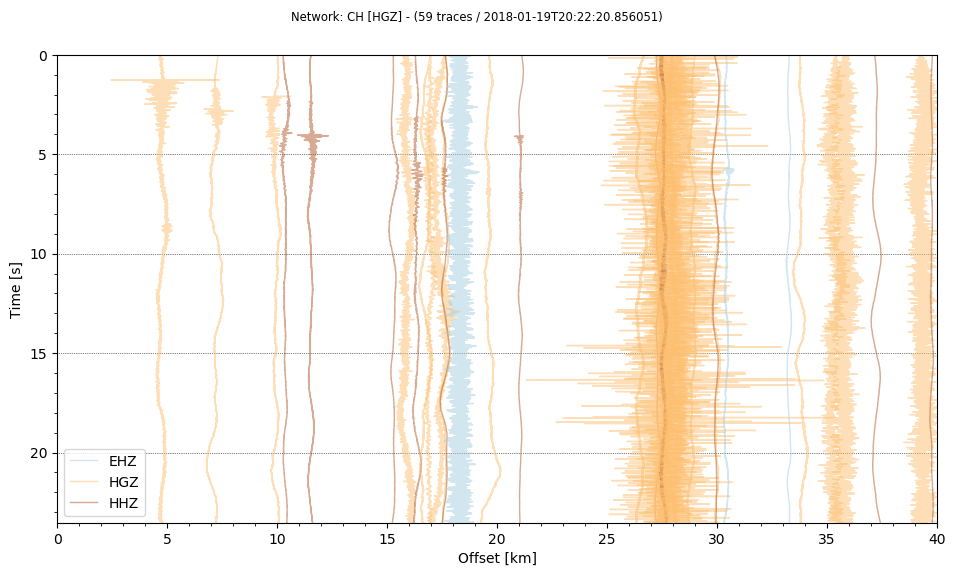

In [39]:
Z_velocities.plot(scale=10,
                  reftime=origin_time,
                  starttime=origin_time,
                  endtime=origin_time+offset_max/1.7,
                  offset_max=offset_max*1000,
                  **section_options)

# Envelope values 
Envelope values output from sceewenv are compared with scenvelope values from the same data and to manual calculations

In our comparison, we compare 
- three output types for each channel :
  - **acc**eleration, 
  - **vel**ocity, 
  - **disp**lacement.
- three processing methods for each output type :
  - **Current**ly post-processed waveforms 
  - _scenvelope'_ **E**nvelopes
  - _scEEWenv'_ **E**nvelopes

## Example 1
Event log paths:

In [8]:
directory = '/Users/fmassin/Documents/Results/SED/events_playback/finder/'
subdirectory = directory+'2017epaqsp/seiscomp3/log/'
scvsmag = subdirectory+'scvsmag@eewpb-envelope-logging-info.log'
scvsmag2 = subdirectory+'scvsmag2@eewpb-envelope-logging-info.log'

Get envelopes logged by scvsmag:

In [ ]:
linthal_vsenv = {}
linthal_vsenv['sceewenv'] = vs_envelope_read(scvsmag2),
linthal_vsenv['scenvelope'] = vs_envelope_read(scvsmag,
                                               scenvelope=True)

Overall all values are consistent despite slightly different for all envelope types. sceewenv is often closer to the currently post-processed waveforms. **Is it still consistent for bigger earthquakes?**

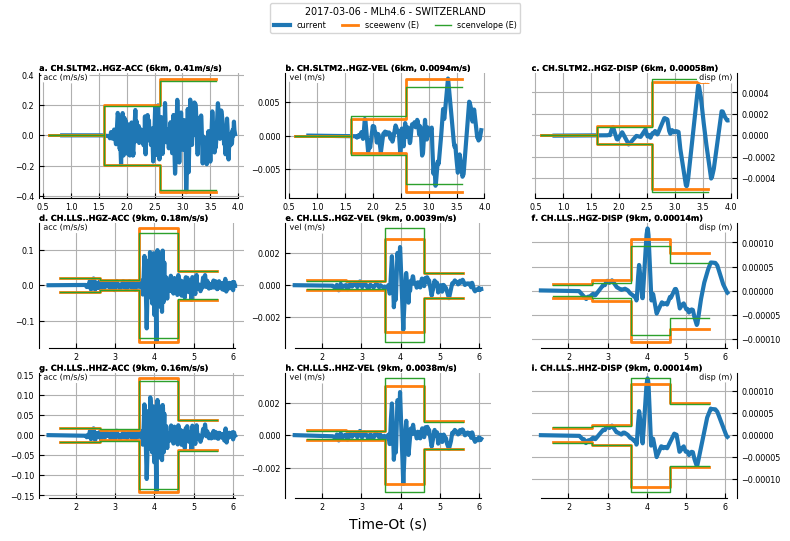

In [57]:
plotstreamsenvelopes(linthal_vsenv,
                     channel='*Z',
                     **linthal)

## Example 2
Event log paths:

In [10]:
directory = '/Users/fmassin/Documents/Results/SED/events_playback/sc-eew-1/'
subdirectory = directory+'20160610032000-20160610033000/seiscomp3/log/'
scvsmag = subdirectory+'scvsmag@eewpb-envelope-logging-info.log'
scvsmag2 = subdirectory+'scvsmag2@eewpb-envelope-logging-info.log'

Get envelopes logged by scvsmag:

In [ ]:
puerto_morazan_vsenv = {}
puerto_morazan_vsenv['sceewenv'] = vs_envelope_read(scvsmag2),
puerto_morazan_vsenv['scenvelope'] = vs_envelope_read(scvsmag,
                                                      scenvelope=True)

Overall scenvelope is not consistent. scenvelope does not respect max signal amplitudes of clipped waveforms and sceewenv is often closer to currently post-processed waveform for velocity and displacement.

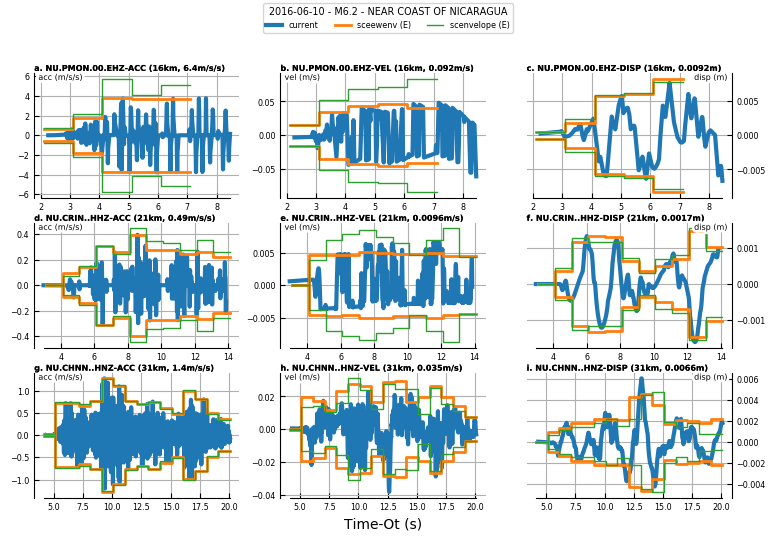

In [67]:
plotstreamsenvelopes(puerto_morazan_vsenv, 
                     channel='*Z',
                     **puerto_morazan)

## Example 3
Event log paths:

In [12]:
directory = '/Users/fmassin/Documents/Results/SED/events_playback/finder/'
subdirectory = directory+'2018bipoyi/seiscomp3/log/'
scvsmag = subdirectory+'scvsmag@eewpb-envelope-logging-info.log'
scvsmag2 = subdirectory+'scvsmag2@eewpb-envelope-logging-info.log'

Get envelopes logged by scvsmag:

In [ ]:
sierre_vsenv = {}
sierre_vsenv['sceewenv'] = vs_envelope_read(scvsmag2),
sierre_vsenv['scenvelope'] = vs_envelope_read(scvsmag,
                                              scenvelope=True)

Envelope values from sceewenv and scenvelope **are consistent for acceleration and velocity**. Displacement is too small to be interpreted.

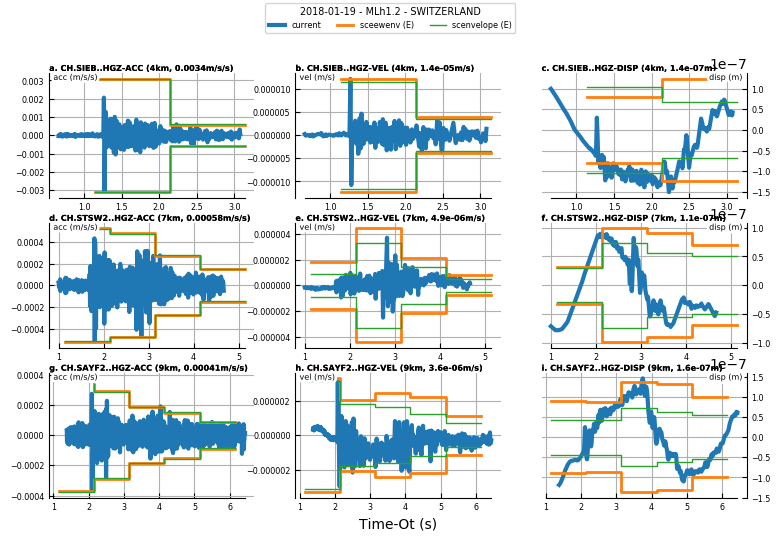

In [59]:
plotstreamsenvelopes(sierre_vsenv, 
                     channel='*Z',
                     **sierre)

# Waveforms and sceewenv
sceewenv has a [test utility (called testeewampsprocs)](https://gitlab.seismo.ethz.ch/SED-EEW/sed-addons/tree/master/test/eewamps) that allows to output pre-processed records and processed envelope records in a miniseed file. 

We use testeewampsprocs outputs to make a comparison with our post-processed waveforms.

In this comparison, we compare 
- three output types for each channel :
  - **acc**eleration, 
  - **vel**ocity, 
  - **disp**lacement.
- three processing type for each output type :
  - **Current**ly post-processed waveforms 
  - _scEEWenv'_ pre-processed waveforms (**φ**)
  - _scEEWenv'_ **E**nvelopes
  
## Example 1
Event eewenv path to mseed output

In [60]:
directory = '/Users/fmassin/Documents/Results/SED/events_playback/finder/2017epaqsp/'

Reads sceewenv output in miniseed (direct comparison for waveforms)

In [ ]:
linthal_eewenv= obspy.read(directory+
                           'eewenv-logging-info.mseed')

Overall all pre-processed waveforms and envelope values are consistent. 

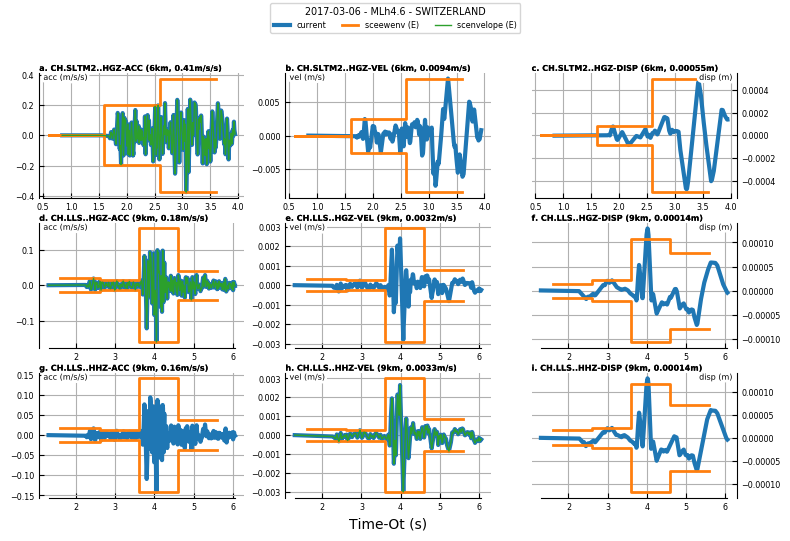

In [61]:
plotstreamsenvelopes({'sceewenv':linthal_eewenv},
                     **linthal)

## Example 2
Event eewenv path to mseed output:

In [62]:
directory = '/Users/fmassin/Documents/Results/SED/events_playback/sc-eew-1'
subdirectory = directory+'/20160610032000-20160610033000/'

Reads sceewenv test output 

In [ ]:
puerto_morazan_eewenv = obspy.read(subdirectory+'eewenv-logging-info.mseed')

HH channels are clipped. But all pre-processed waveforms and envelope values are consistent. 

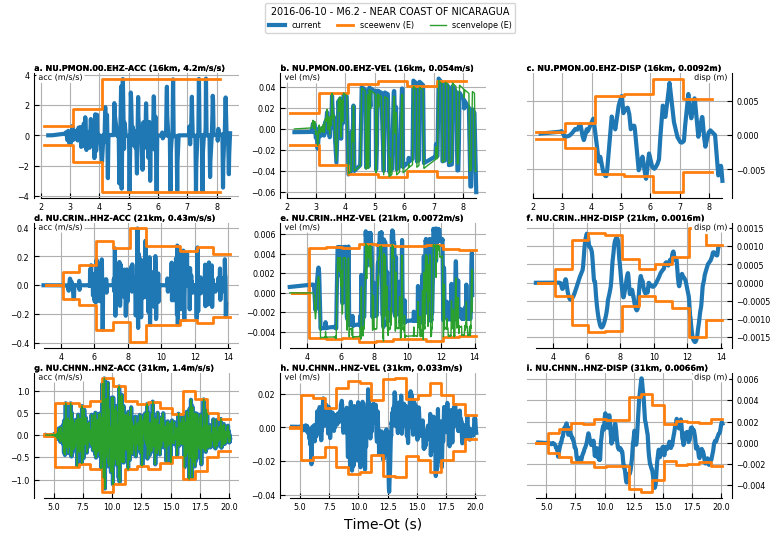

In [63]:
#puerto_morazan = remove_sensitivity(puerto_morazan)
plotstreamsenvelopes({'sceewenv': puerto_morazan_eewenv},
                     **puerto_morazan)

## Example 3
Event eewenv path to mseed output:

In [64]:
directory = '/Users/fmassin/Documents/Results/SED/events_playback/finder/2018bipoyi/'

Reads sceewenv test output :

In [ ]:
sierre_eewenv = obspy.read(directory+'eewenv-logging-info.mseed')

All pre-processed waveforms and envelope values are consistent. 

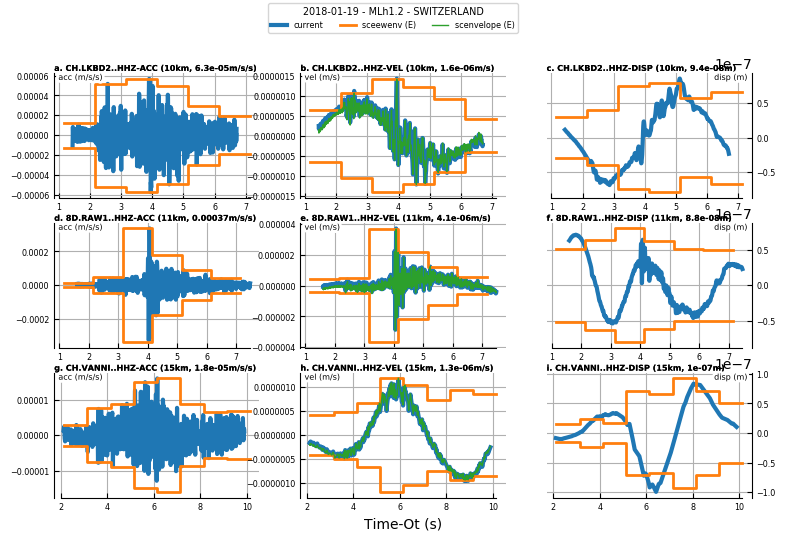

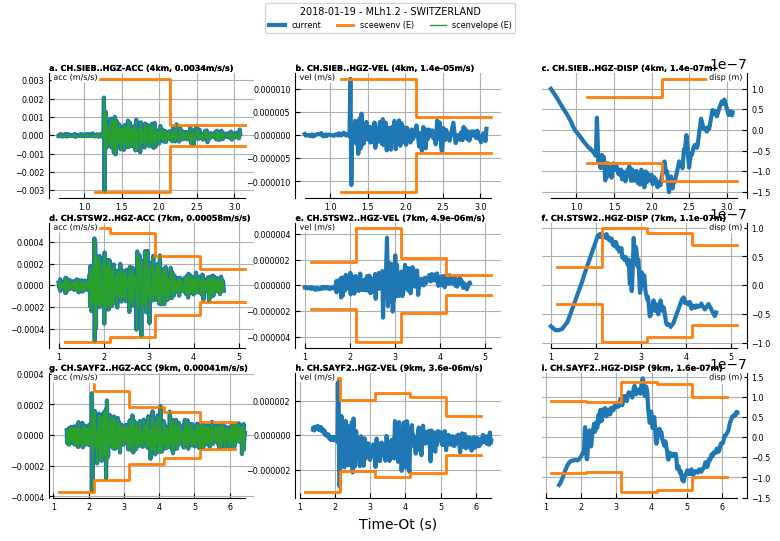

In [66]:
#puerto_morazan = remove_sensitivity(puerto_morazan)
plotstreamsenvelopes({'sceewenv': sierre_eewenv},
                     channel='*HZ',
                     **sierre)
plotstreamsenvelopes({'sceewenv': sierre_eewenv},
                     channel='*GZ',
                     **sierre)

# Preliminary conclusions
sceewenv is closer to currently post-processed that scenvelope.